<h1><u>Proyecto N°2 Mineria de datos</u></h1>

<p>Se nos pide crear un programa computacional que permita a la aerolínea PANAM estimar si un vuelo tendrá más de 4 no show en su vuelo. Esto es importante ya que en casos</p>

<div><b>Tabla de contenidos: </b>
    <ol>
        <li>Limpieza de datos</li>
        <li>Modelo de Clasificación</li>
        <li>Selección del modelo final</li>
        <li>Evaluacion de la 2da base de datos</li> 
    </ol>
</div>

--------
<h1>1. Limpieza de datos</h1>

<p>En un principio seleccionamos las variables que creemos serán relevantes para entrenar el modelo, cabe destacar que estas son las variables que a nuestro parecer son las más representativas, esto requiere un análisis de un experto en el tema del negocio de vuelos comerciales para obtener mejores resultados.</p>
<ul>
    <li>date: ya que puede ser una variable importante al momento de analizar temporadas del año en que ocurren "noshow",
        esta variable es separada en mes y día del mes.</li>
    <li>departure_time: horas extremas (madrugada) pueden llegar a influir en los "noshow", esta variable
        es separada en hora y minutos.</li>
    <li>fligth_number: conocer las rutas en donde mayoritariamente pueden existir más "noshow".</li>
    <li>origin: conocer desde que aeropuertos se producen los "noshow".</li>
    <li>destination: conocer hacía que aeropuertos se producen los "noshow".</li>
    <li>noshow: dato central con el cual crearemos nuestra predicción.</li>
    <li>denied_boarding: puede ser útil a la hora de estimar el error que se ha producido con la sobre venta.</li>
    <li>pax_hig: puede ser útil para categorizar quienes son más propensos a no presentarse.</li>
    <li>pax_midhigh: puede ser útil para categorizar quienes son más propensos a no presentarse.</li>
    <li>pax_midlow: puede ser útil para categorizar quienes son más propensos a no presentarse.</li>
    <li>pax_low: puede ser útil para categorizar quienes son más propensos a no presentarse.</li>
    <li>dom_cnx: debido a que una conexión puede causar un retraso en la persona que viaja, esta variable es considerada.</li>
    <li>int_cnx: al igual que la variable anterior el hecho de ser una conexión de vuelo es probable que influya en los
        “noshow” mediante retrasos en las conexiones.</li>
    <li>p2p: es importante para saber equilibrar con aquellos pasajeros que si hacen conexiones.</li>
</ul>
 <p>Realizamos la limpieza de los datos desde 3 focos; Revisar y eliminar datos repetidos, analizar valores Na e interpretación de datos atipicos. </p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
# import sys
# !{sys.executable} -m pip install sklearn-pandas

##cargamos el csv.
airlineDF = pd.read_csv('./trainData.csv',sep=",")

##eliminamos las columnas que no creemos necesarias.
airlineDF.drop(labels=['Unnamed: 0','capacity', 'revenues_usd','bookings','pax_freqflyer','group_bookings','out_of_stock'], axis= 1, inplace= True)

##verificamos que no existan duplicados.
print("cantidad de duplicados: " + str(airlineDF.duplicated().sum()))

##verificamos que no existan Na.
print(airlineDF.isna().sum())
airlineDF.dropna(inplace= True)

print(airlineDF.isna().sum())

##buscamos outliers utilizando boxplots de las variables, para esto necesitamos trabajar algunas variables antes
#extraemos los meses y los dias de "date" para utilizarlos como nuevas variabes.
airlineDF['date'] = pd.to_datetime(airlineDF['date'], format= '%Y-%m-%dT', errors= 'coerce')
airlineDF.insert(1,"departure_month" , airlineDF['date'].dt.month)
airlineDF.insert(2,"departure_day" , airlineDF['date'].dt.day)
#eliminamos la columna "date" ya que tenemos los meses y dias en las nuevas columnas.
airlineDF.drop(labels= 'date', axis=1 , inplace= True)

#extraemos la hora y los minutos de "departure_time" para utilizarlos como nuevas variables.
airlineDF['departure_time'] = pd.to_datetime(airlineDF['departure_time'])
airlineDF.insert(14,"departure_hour" , airlineDF['departure_time'].dt.hour)
airlineDF.insert(15,"departure_minute" , airlineDF['departure_time'].dt.minute)
#eliminamos la columna "departure_time" ya que tenemos las horas y minutos en las nuevas columnas.
airlineDF.drop(labels= 'departure_time', axis=1 , inplace= True)

#creamos una copia del dataframe para ver graficamente los outliers.
tempDF = airlineDF.copy(deep= True)
tempDF.drop(labels= ['origin', 'destination'], axis= 1, inplace= True)

# #graficamos los boxplot de cada variable por separado.
# for column in tempDF.columns:
#     plt.figure()
#     tempDF.boxplot([column])

#revisamos la correlación de las variables para hacer la ultima seleccion de las variables a utilizar y disminuir 
#la complejidad del modelo.

#por temas de comodidad corremos la variable "noshow" a la primera columna


#creamos la matriz de correlación(a diferencia de la matriz de covarianza, aca no es necesario estandarizar ya que los valores
# van desde -1 a 1)
tempDF_correlation = tempDF.corr()

tempDF_correlation


## creamos una columna "target" que cumplira con la condición requerida para catalogar como "0" o "1" el vuelo

airlineDF['target'] = np.where(airlineDF['noshow'] >= 4, 1,0)
airlineDF.drop(labels= 'noshow', axis=1 , inplace= True)

tempDF_correlation











cantidad de duplicados: 0
date                  0
fligth_number         0
origin                0
destination           0
distance              0
noshow                0
denied_boarding       0
pax_midlow            0
pax_high              0
pax_midhigh           0
pax_low               0
dom_cnx               0
int_cnx               0
p2p                   0
departure_time     1418
dtype: int64
date               0
fligth_number      0
origin             0
destination        0
distance           0
noshow             0
denied_boarding    0
pax_midlow         0
pax_high           0
pax_midhigh        0
pax_low            0
dom_cnx            0
int_cnx            0
p2p                0
departure_time     0
dtype: int64


,departure_month,departure_day,fligth_number,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,dom_cnx,int_cnx,departure_hour,departure_minute,p2p
departure_month,1.000000,0.025107,-0.035635,-0.008197,0.005874,0.009852,-0.052880,-0.015380,-0.055107,-0.003799,0.027768,-0.024587,-0.007633,0.000004,-0.041386
departure_day,0.025107,1.000000,-0.004271,-0.001087,-0.003067,0.001880,0.010416,0.016733,0.013999,0.000287,0.016170,0.001332,0.000597,0.000505,0.006150
fligth_number,-0.035635,-0.004271,1.000000,-0.165506,0.103790,0.024078,-0.227998,0.016133,0.117632,0.168681,-0.079094,-0.142108,-0.034091,0.004467,0.059538
distance,-0.008197,-0.001087,-0.165506,1.000000,0.057667,0.000039,0.404554,0.041158,0.030113,0.169810,-0.233322,0.625805,0.088534,0.016479,0.123509
noshow,0.005874,-0.003067,0.103790,0.057667,1.000000,-0.022252,0.053084,0.022336,0.017453,0.129572,-0.034852,0.015795,-0.024454,-0.001112,0.132173
denied_boarding,0.009852,0.001880,0.024078,0.000039,-0.022252,1.000000,-0.020263,0.032818,0.011405,0.022923,-0.016066,0.007478,-0.000718,0.001884,0.007730
pax_midlow,-0.052880,0.010416,-0.227998,0.404554,0.053084,-0.020263,1.000000,0.008923,-0.044458,0.282460,0.080838,0.444999,0.004833,0.010851,0.537471
pax_high,-0.015380,0.016733,0.016133,0.041158,0.022336,0.032818,0.008923,1.000000,0.294970,-0.177712,0.060671,0.153969,0.002369,-0.006798,-0.069359
pax_midhigh,-0.055107,0.013999,0.117632,0.030113,0.017453,0.011405,-0.044458,0.294970,1.000000,-0.192163,0.099354,0.003663,0.037218,-0.013517,-0.007029
pax_low,-0.003799,0.000287,0.168681,0.169810,0.129572,0.022923,0.282460,-0.177712,-0.192163,1.000000,-0.156657,0.108151,0.017860,0.033819,0.725418


/tmp/ipykernel_278/357455343.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(tempDF_correlation, dtype=np.bool)


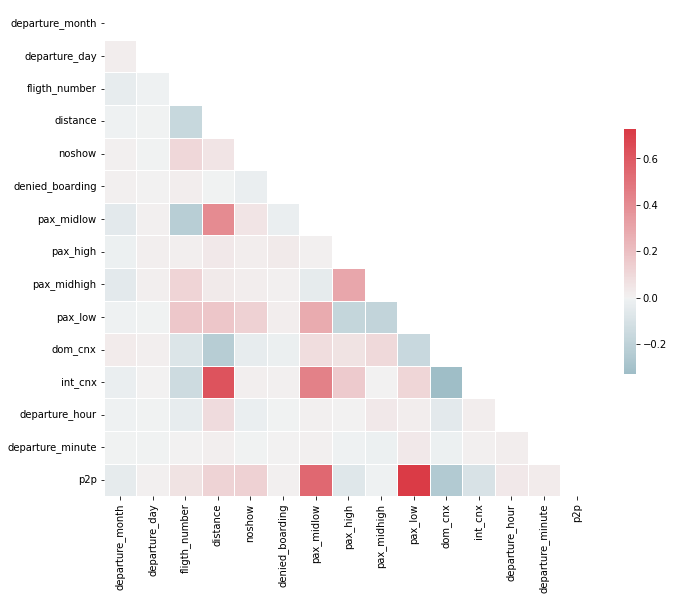

In [7]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(tempDF_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr_plot_matrix = sns.heatmap(tempDF_correlation, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# save the figure
fig = corr_plot_matrix.get_figure()
fig.savefig('ME-CORR.png')

<p>En conclusión, en la limpieza de los datos no encontramos filas duplicadas, pero si filas que no contenían valores en una de las variables seleccionadas(departure_time). La cantidad de elementos Na en esta variable son 1418 que representan un 0.14% del total de los datos, por lo que debido a que la cantidad de datos con valores Na es muy baja en comparación al total de datos, decidimos eliminar estas filas ya que creemos que la cantidad de filas a eliminar es insignificante.Al analizar los outliers de las variables seleccionadas mediante gráficos de caja vemos que dada la naturaleza de las distintas variables no existen datos que se alejen de la realidad de estas mismas por lo que no eliminamos ningún outlier. Por ultimo creamos una columna que sera nuestro "target feature" el cual segun la cantidad de "noshows" si es mayor o igual a 4 el valor sera "1" en caso contrario el valor sera "0". </p>

--------
<h1>2.Modelos de Clasificación </h1>
<h2>2.1 K-Neighbors</h2>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

# airlineDF.drop(labels= ['origin', 'destination'], axis= 1, inplace= True)


numIteraciones = 20
accModel1 = np.zeros((numIteraciones,1))
accModel2 = np.zeros((numIteraciones,1))

for i in range(numIteraciones):
    X_train, X_test, y_train, y_test = train_test_split(airlineDF, airlineDF['target'], test_size=0.33,random_state=42)
    # K = 1
    KNN = KNeighborsClassifier(n_neighbors= 1 , weights="uniform")
    KNN = KNN.fit(X_train, y_train)
    prediccion = KNN.predict(X_train)
    accModel1[i] = mt.accuracy_score(y_train, prediccion)
    
    # K = 20
    KNN = KNeighborsClassifier(n_neighbors= 20 , weights="uniform")
    KNN = KNN.fit(X_train, y_train)
    prediccion = KNN.predict(X_train)
    accModel2[i] = mt.accuracy_score(y_train, prediccion)

print(f"Modelo 1: {accModel1.mean()} +- {accModel1.std()}")
print(f"Modelo 2: {accModel2.mean()} +- {accModel2.std()}")

NameError: name 'np' is not defined